In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
! pip install livelossplot

  Running setup.py bdist_wheel for livelossplot ... - done
  Stored in directory: /root/.cache/pip/wheels/bf/66/07/e3129f723b6b36ee4affde650ad6843fceaf5c2fa5dc29b986
Successfully built livelossplot


In [0]:
import livelossplot
from run_classifier import *
import tokenization
import random
import pandas as pd

np.random.seed(112)
random.seed(112)


import nltk
nltk.download('stopwords')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
class args_class(object):
  def __init__(self, data_dir, task_name, model_dir,\
              num_classes, batch_size, learning_rate,\
              output_file,max_sequence_length, num_train_epochs):
    
    self.data_dir=data_dir
    self.task_name=task_name
    self.model_dir=model_dir
    self.num_classes=num_classes
    self.batch_size=batch_size
    self.learning_rate=learning_rate
    self.output_file=output_file
    self.max_sequence_length=max_sequence_length
    self.num_train_epochs=num_train_epochs
    
    
class BERTClassifierLive(BERTClassifier):
  
  def __init__(self, bert_path, input_file=None, input_list=[], \
                     num_classes=2, labels=None, \
                     Verbose=False, dummy=False, \
                     split_train_test=True, test_size=0.1, val_size=0.1, batch_size=32, epochs=30, max_seq_length=128, \
                     learning_rate=0.003,use_dropout=True,dropout_prob=0.1,max_delay=50, **kwargs):
      
      super().__init__(bert_path=bert_path, input_file=input_file, input_list=input_list, \
                     num_classes=num_classes, labels=labels, \
                     Verbose=Verbose, dummy=dummy, \
                     split_train_test=split_train_test, test_size=test_size,val_size=val_size, epochs=epochs, batch_size=batch_size, max_seq_length=max_seq_length, \
                     learning_rate=learning_rate, use_dropout=use_dropout,dropout_prob=dropout_prob,max_delay=max_delay, **kwargs)
    
  
  def train(self, batch_size=32, validation_split=0.1):
       
      self.model.fit(x=self.data.data_train, y=self.data.labels_train,\
                          validation_split=validation_split,\
                           epochs=self.epochs, batch_size=batch_size, verbose=1,
                           callbacks=self.callbacks+[livelossplot.PlotLossesKeras()])

In [0]:
args = args_class(data_dir='data/sentiment_dataset/', \
      task_name='SST2', \
      model_dir='pre_trained_models/eng_embeddings/uncased_L-12_H-768_A-12/', \
      num_classes=2,\
      batch_size=32, \
      learning_rate=8e-5, \
      output_file='results/test_classifier_28dec_full_lr9e-5.h5',\
      max_sequence_length=128,\
      num_train_epochs=30)
 


sentences, labels = load_dataset(args.data_dir, task_name=args.task_name, sample=True, sample_size=30000)


model = BERTClassifierLive(bert_path=args.model_dir, input_list=sentences, \
                           num_classes=args.num_classes,\
                           batch_size= args.batch_size, \
                           labels=labels, \
                           Verbose=True, \
                           dummy=False,
                           learning_rate=args.learning_rate, epochs=args.num_train_epochs,\
                           use_dropout=True, dropout_prob=0.1, max_delay=5, test_size=0.1)


Loading SST2 dataset .... 
Sentences and labels shape:
(30000,)
(30000,)
Generating tokens for BERT...
Bert tokens generated with shape : (30000, 4, 128)
Shape of labels (BEFORE one-hot encoding): (30000,)
Shape of labels (AFTER  one-hot encoding): (30000, 2)

Training data set size  (27000, 4, 128)
Test data set size  (3000, 4, 128)

 Loading BERT Embeddings...
------ BERT model initialized. 
------ Filling with pre-trained weights... 
------  Filled. 
 
Bert built
Dropout built with dropout prob  0.1
Dense built
Model defined

 ------ Model architecture: sequential
__________________________________________________________________________________________
Layer (type)                            Output Shape                        Param #       
pre_trained_bert_model_1 (PreTrainedBer (None, 768)                         0             
__________________________________________________________________________________________
dropout_37 (Dropout)                    (None, 768)           

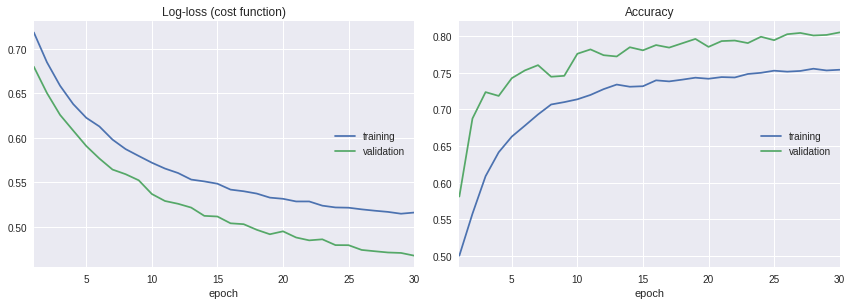

Log-loss (cost function):
training   (min:    0.515, max:    0.718, cur:    0.516)
validation (min:    0.468, max:    0.680, cur:    0.468)

Accuracy:
training   (min:    0.500, max:    0.755, cur:    0.754)
validation (min:    0.581, max:    0.805, cur:    0.805)


In [6]:
print("Training model....")
model.train(batch_size=args.batch_size, validation_split=0.15)

In [ ]:
res = model.evaluate()
print(res)

In [0]:
print("Saving to: ", args.output_file)
model.save(args.output_file)
print("Done.")

